# US CENSUS - Visualization
## 0 - Import some libraries

In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import seaborn as sns

## I - Load DataSets

In [2]:
PATH = '../Data/'
FILE = os.listdir(PATH)
print(FILE)

['census_income_learn.csv', 'census_income_metadata.txt', 'census_income_test.csv', 'us_census_full.zip']


In [3]:
# Search for column names in the census_income_metadata file
file_object  = open(PATH+'census_income_metadata.txt', 'r')

text = file_object.read()
text_ = text.replace('\n','').split('|')

col = [text_[82+i].split('(')[1].split(')')[0] for i in range(40)]
col_ = col[:24]+['col_to_determine']+col[24:]+['50k']

In [4]:
# Load DataSets and display their shapes
df = pd.read_csv(PATH+'census_income_learn.csv', header=None, names=col_, na_values=' Not in universe')
test = pd.read_csv(PATH+'census_income_test.csv', header=None, names=col_, na_values=' Not in universe')

print('Learn shape : ', df.shape)
print('Test shape : ', test.shape)

# changing the target values to binary values
df['50k'] = df['50k'].apply(lambda x : 0 if str(x)[1]=='-' else 1)
test['50k'] = test['50k'].apply(lambda x : 0 if str(x)[1]=='-' else 1)

Learn shape :  (199523, 42)
Test shape :  (99762, 42)


## II - Statistic and audit of the different columns' content

### 0 - Some functions

In [5]:
def display_missing_values(col):
    print('Missing values on train set : ', df[col].isnull().sum(), ' / ', df.shape[0])
    print('Missing values on test set : ', test[col].isnull().sum(), ' / ', test.shape[0])
    return

In [6]:
def plot_categorical_col(col, rotation=0, alignment='center'):
    
    plt.figure(figsize=(12,4))
    df[col].value_counts().plot(kind='bar')
    plt.xticks(rotation=rotation, horizontalalignment=alignment)
    plt.title('Distribution of '+col+' column')
    plt.xlabel(col)
    plt.ylabel('Amount')

    mat = pd.crosstab(df[col], df['50k'], normalize='index', dropna=False)
    mat.plot(kind = 'bar', figsize=(12,4))
    plt.legend(['- 50k$/y', '+ 50k$/y'], loc='best')
    plt.xticks(rotation=rotation, horizontalalignment=alignment)
    plt.xlabel(col)
    plt.ylabel('%')
    plt.title('Percentage per classes earning more or less than 50k$/y')
    plt.show()

### 42 - +/- 50k$ / year

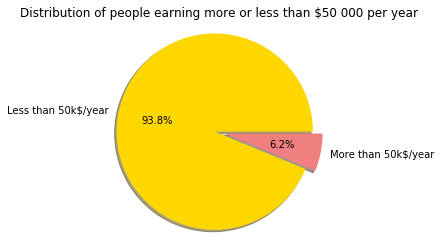

In [7]:
sizes = [df['50k'].value_counts()[0], df['50k'].value_counts()[1]]
labels = ['Less than 50k$/year', 'More than 50k$/year']
colors = ['gold', 'lightcoral']

plt.pie(sizes, explode=(0,0.1), labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Distribution of people earning more or less than $50 000 per year')
plt.show()

### 0 - Age

In [8]:
print(df['age'].isnull().sum())
print(test['age'].isnull().sum())

0
0


Missing values on train set :  0  /  199523
Missing values on test set :  0  /  99762


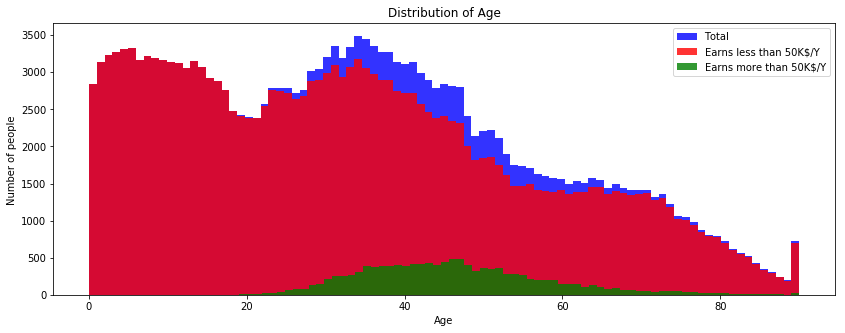

In [9]:
display_missing_values('age')

plt.figure(figsize=(14,5))
df['age'].hist(bins=df['age'].nunique(), grid=False, alpha=0.8, color='b', label='Total')
df.loc[df['50k']==0, 'age'].hist(bins=df.loc[df['50k']==0, 'age'].nunique(), grid=False, alpha=0.8, color='r', label='Earns less than 50K$/Y')
df.loc[df['50k']==1, 'age'].hist(bins=df.loc[df['50k']==1, 'age'].nunique(), grid=False, alpha=0.8, color='g', label='Earns more than 50K$/Y')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of people ')
plt.legend(loc='best')
plt.show()

In [10]:
# Correlation between Age and Earning more or less than 50k$/y
df[['age','50k']].corr(method='pearson')

,age,50k
age,1.00000,0.13572
50k,0.13572,1.00000


### 1 - Class of worker

Missing values on train set :  100245  /  199523
Missing values on test set :  50079  /  99762


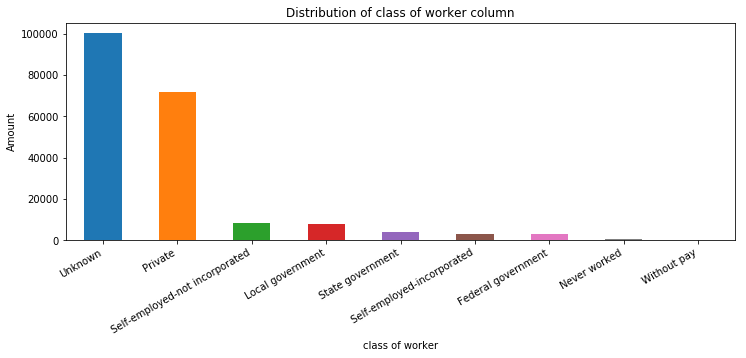

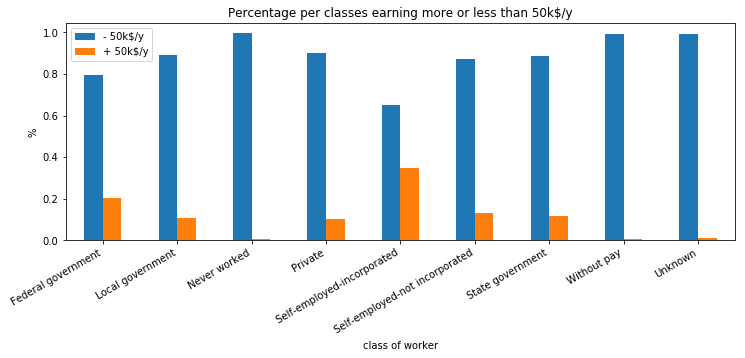

In [11]:
display_missing_values('class of worker')

df['class of worker'] = df['class of worker'].fillna('Unknown').astype('category')
test['class of worker'] = test['class of worker'].fillna('Unknown').astype('category')

plot_categorical_col('class of worker', rotation=30, alignment='right')

### 2 - detailed industry recode

Missing values on train set :  0  /  199523
Missing values on test set :  0  /  99762


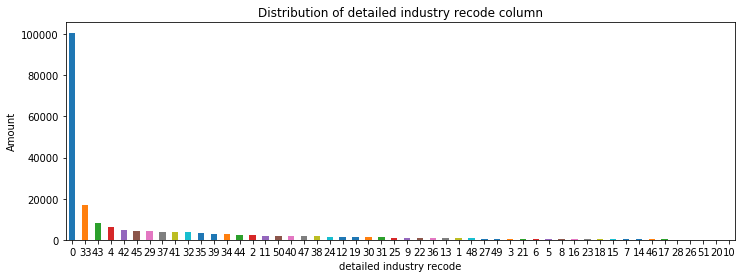

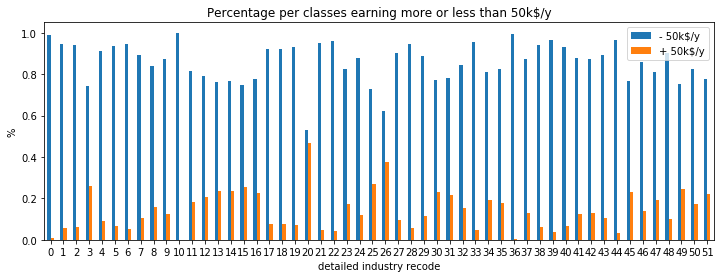

In [12]:
display_missing_values('detailed industry recode')

plot_categorical_col('detailed industry recode')

### 3 - detailed occupation recode

Missing values on train set :  0  /  199523
Missing values on test set :  0  /  99762


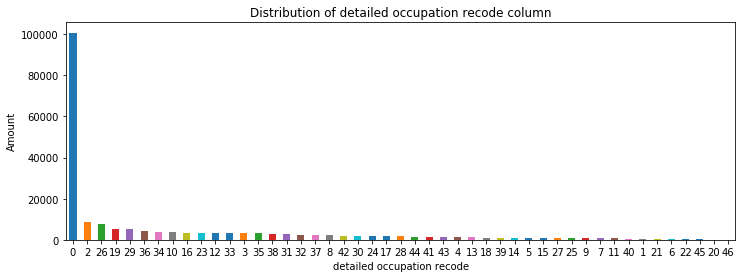

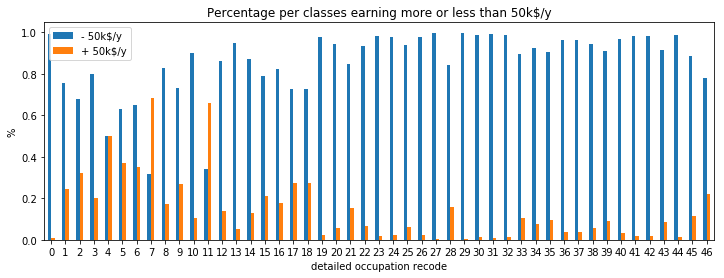

In [13]:
display_missing_values('detailed occupation recode')

plot_categorical_col('detailed occupation recode')

### 4 - education

Missing values on train set :  0  /  199523
Missing values on test set :  0  /  99762


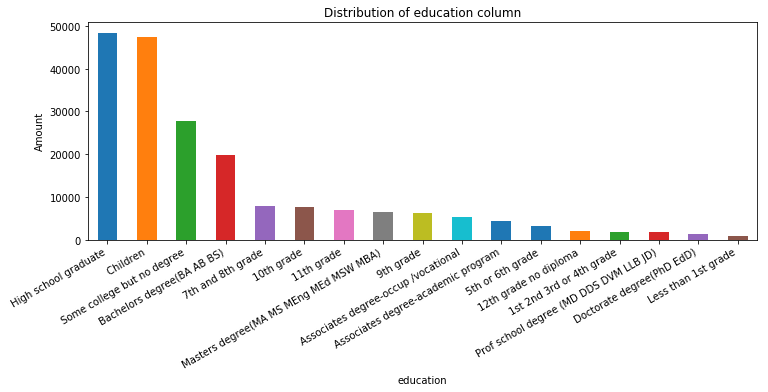

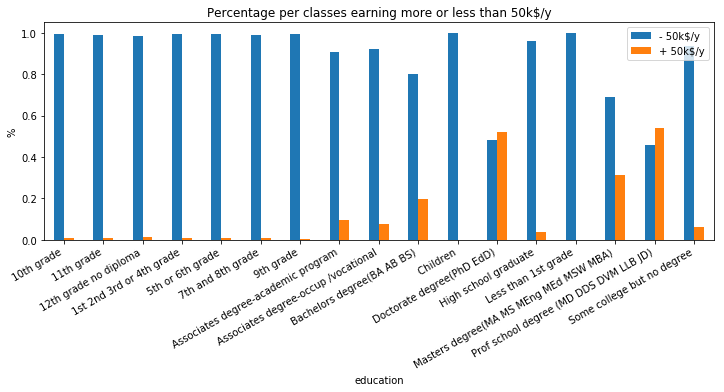

In [14]:
display_missing_values('education')

plot_categorical_col('education', rotation=30, alignment='right')

### 5 - wage per hour

Missing values on train set :  0  /  199523
Missing values on test set :  0  /  99762


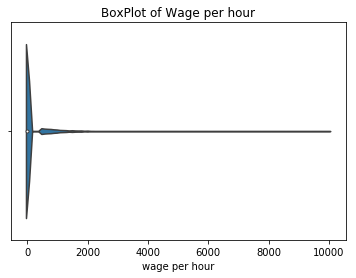

,wage per hour,50k
wage per hour,1.000000,0.024528
50k,0.024528,1.000000


In [15]:
display_missing_values('wage per hour')

plt.figure()
sns.violinplot(df['wage per hour'])
plt.title('BoxPlot of Wage per hour')
plt.show()

df[['wage per hour','50k']].corr()

### 6 - enroll in edu inst last wk

Missing values on train set :  186943  /  199523
Missing values on test set :  93424  /  99762


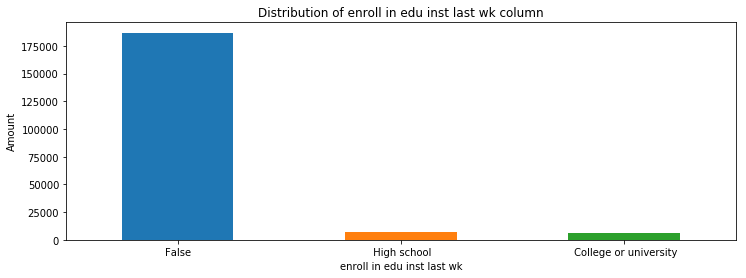

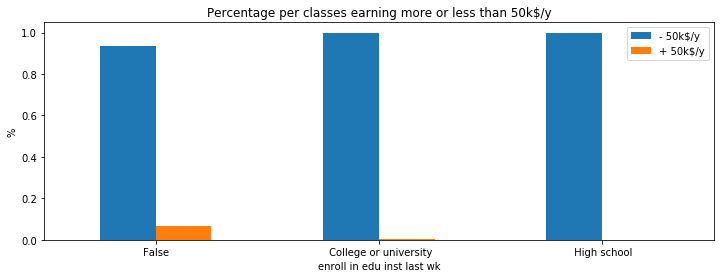

In [16]:
display_missing_values('enroll in edu inst last wk')

df['enroll in edu inst last wk'] = df['enroll in edu inst last wk'].fillna(False)
test['enroll in edu inst last wk'] = test['enroll in edu inst last wk'].fillna(False)

plot_categorical_col('enroll in edu inst last wk')

### 7 - marital stat

Missing values on train set :  0  /  199523
Missing values on test set :  0  /  99762


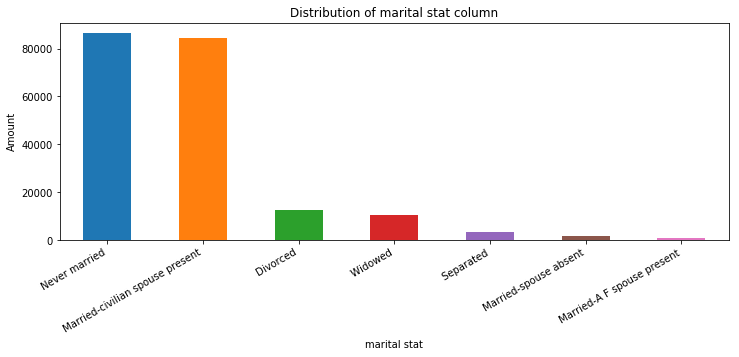

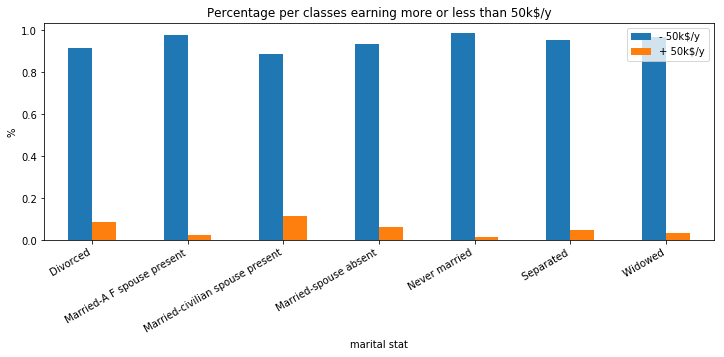

In [17]:
display_missing_values('marital stat')

plot_categorical_col('marital stat', rotation=30, alignment='right')

### 8 - major industry code

Missing values on train set :  0  /  199523
Missing values on test set :  0  /  99762


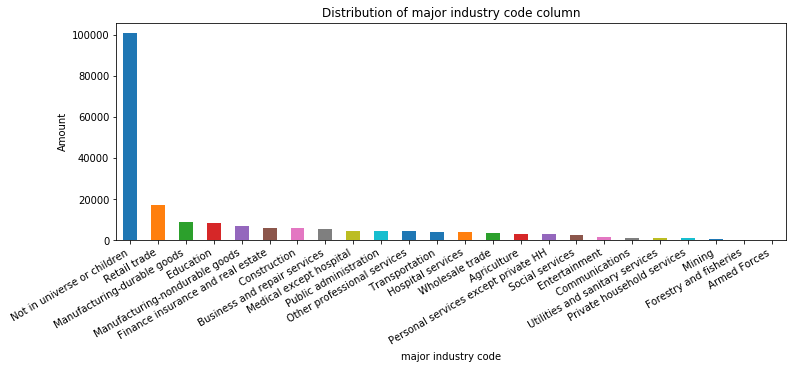

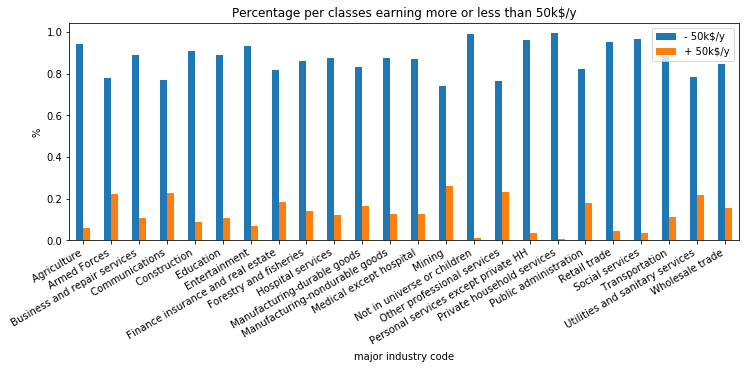

In [18]:
display_missing_values('major industry code')

plot_categorical_col('major industry code', rotation=30, alignment='right')

### 9 - major occupation code

Missing values on train set :  100684  /  199523
Missing values on test set :  50283  /  99762


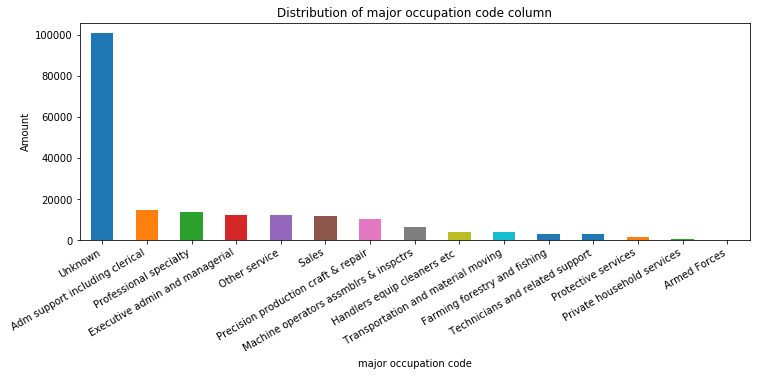

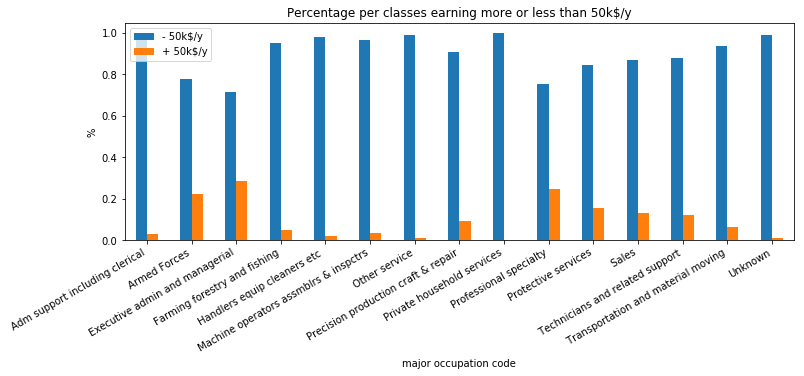

In [19]:
display_missing_values('major occupation code')

df['major occupation code'] = df['major occupation code'].fillna('Unknown')
test['major occupation code'] = test['major occupation code'].fillna('Unknown')

plot_categorical_col('major occupation code', rotation=30, alignment='right')

### 10 - race

Missing values on train set :  0  /  199523
Missing values on test set :  0  /  99762


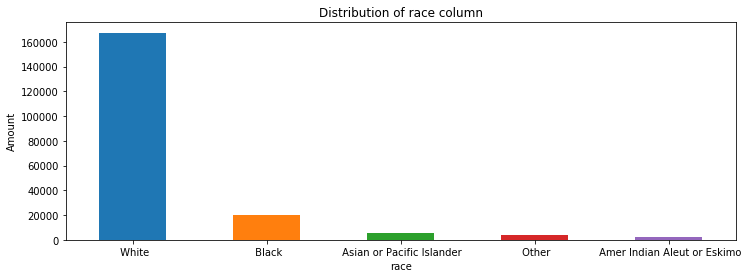

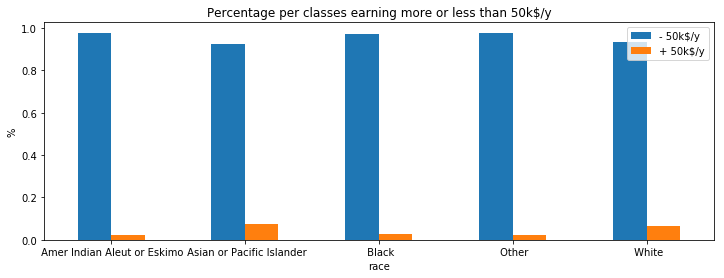

In [20]:
display_missing_values('race')

plot_categorical_col('race')

### 11 - hispanic origin

Missing values on train set :  0  /  199523
Missing values on test set :  0  /  99762


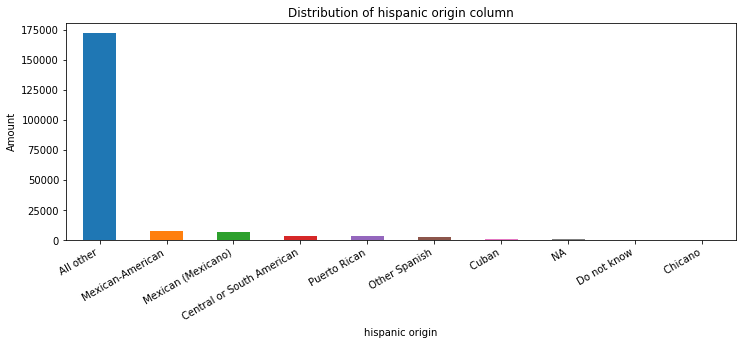

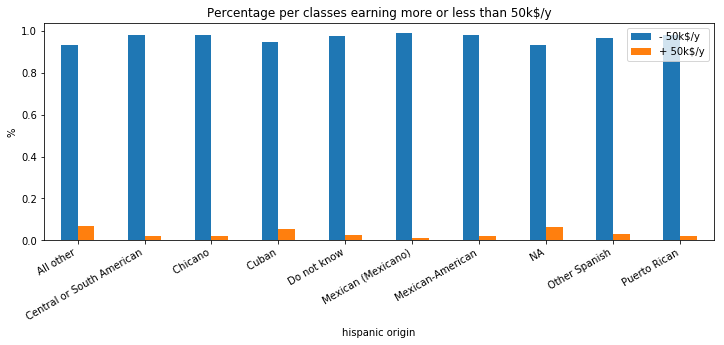

In [21]:
display_missing_values('hispanic origin')

plot_categorical_col('hispanic origin', rotation=30, alignment='right')

### 12 - sex

Missing values on train set :  0  /  199523
Missing values on test set :  0  /  99762


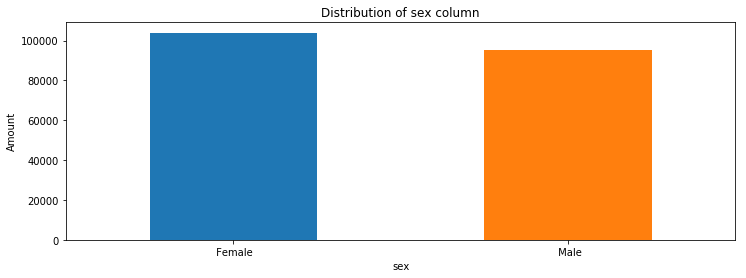

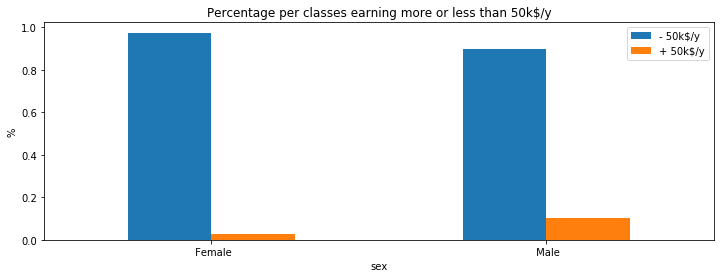

In [22]:
display_missing_values('sex')

plot_categorical_col('sex')

### 13 - member of a labor union

Missing values on train set :  180459  /  199523
Missing values on test set :  90283  /  99762


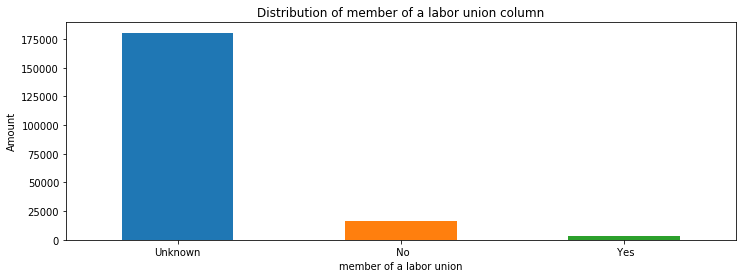

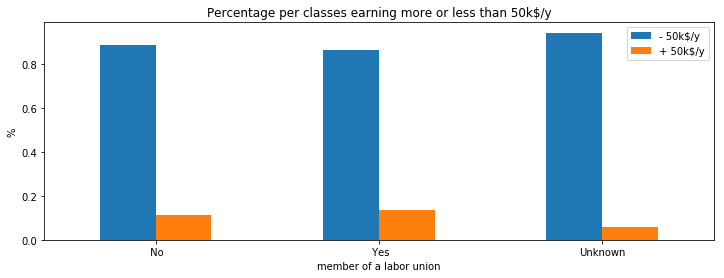

In [23]:
display_missing_values('member of a labor union')

df['member of a labor union'] = df['member of a labor union'].fillna('Unknown')
test['member of a labor union'] = test['member of a labor union'].fillna('Unknown')

plot_categorical_col('member of a labor union')

### 14 - reason for unemployment

Missing values on train set :  193453  /  199523
Missing values on test set :  96632  /  99762


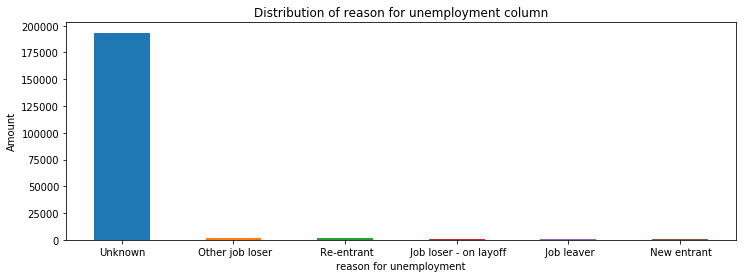

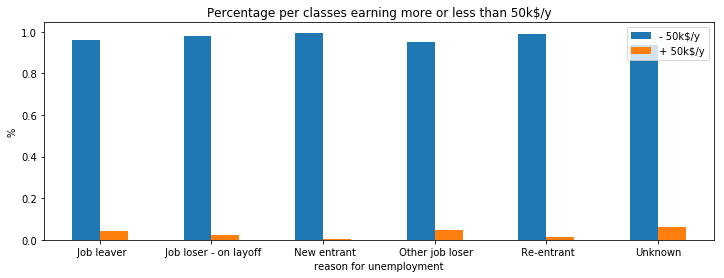

In [24]:
display_missing_values('reason for unemployment')

df['reason for unemployment'] = df['reason for unemployment'].fillna('Unknown')
test['reason for unemployment'] = test['reason for unemployment'].fillna('Unknown')

plot_categorical_col('reason for unemployment')

### 15 - full or part time employment stat

Missing values on train set :  0  /  199523
Missing values on test set :  0  /  99762


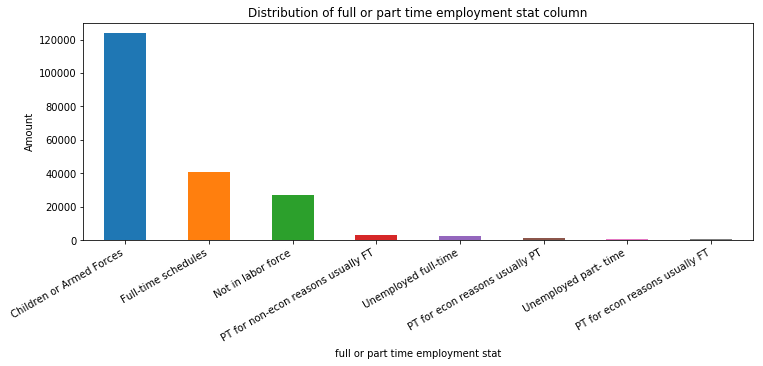

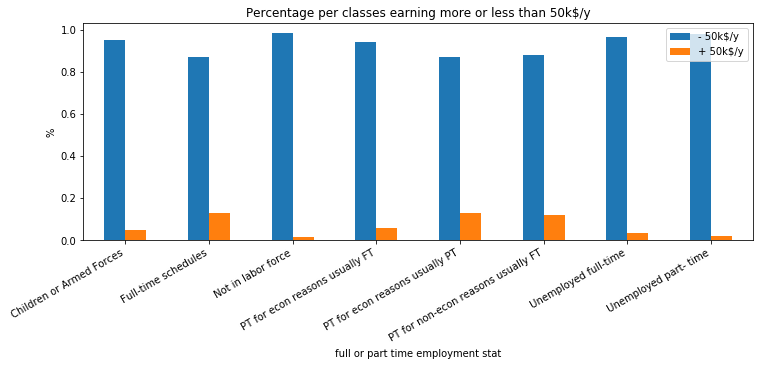

In [25]:
display_missing_values('full or part time employment stat')

plot_categorical_col('full or part time employment stat', rotation=30, alignment='right')

### 16 - capital gains

In [26]:
display_missing_values('capital gains')

print('\n')
print(df.loc[df['50k']==1, 'capital gains'].describe())
print('\n')
print(df.loc[df['50k']==0, 'capital gains'].describe())

print('\n')
print(df[['capital gains','50k']].corr())

Missing values on train set :  0  /  199523
Missing values on test set :  0  /  99762


count    12382.000000
mean      4830.930060
std      16887.627002
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital gains, dtype: float64


count    187141.000000
mean        143.848013
std        1815.343341
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       99999.000000
Name: capital gains, dtype: float64


               capital gains       50k
capital gains       1.000000  0.240725
50k                 0.240725  1.000000


### 17 - capital losses

In [27]:
display_missing_values('capital losses')

print('\n')
print(df.loc[df['50k']==1, 'capital losses'].describe())
print('\n')
print(df.loc[df['50k']==0, 'capital losses'].describe())

print('\n')
print(df[['capital losses','50k']].corr())

Missing values on train set :  0  /  199523
Missing values on test set :  0  /  99762


count    12382.000000
mean       193.139557
std        607.542507
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3683.000000
Name: capital losses, dtype: float64


count    187141.000000
mean         27.003730
std         229.535067
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        4608.000000
Name: capital losses, dtype: float64


                capital losses       50k
capital losses        1.000000  0.147417
50k                   0.147417  1.000000


### 18 - dividends from stocks

In [28]:
display_missing_values('dividends from stocks')

print('\n')
print(df.loc[df['50k']==1, 'dividends from stocks'].describe())
print('\n')
print(df.loc[df['50k']==0, 'dividends from stocks'].describe())

print('\n')
print(df[['dividends from stocks','50k']].corr())

Missing values on train set :  0  /  199523
Missing values on test set :  0  /  99762


count    12382.000000
mean      1553.448070
std       6998.071762
min          0.000000
25%          0.000000
50%          0.000000
75%        363.000000
max      99999.000000
Name: dividends from stocks, dtype: float64


count    187141.000000
mean        107.816518
std         909.774217
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       39000.000000
Name: dividends from stocks, dtype: float64


                       dividends from stocks       50k
dividends from stocks               1.000000  0.175779
50k                                 0.175779  1.000000


### 19 - tax filer stat

Missing values on train set :  0  /  199523
Missing values on test set :  0  /  99762


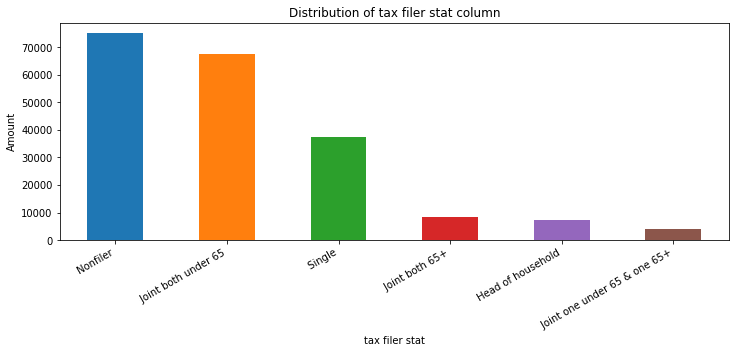

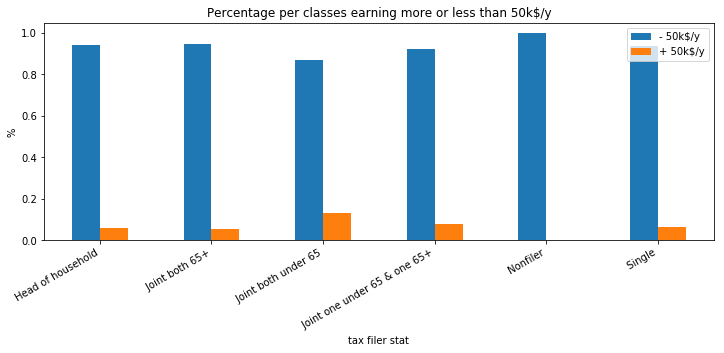

In [29]:
display_missing_values('tax filer stat')

plot_categorical_col('tax filer stat', rotation=30, alignment='right')

### 20 - region of previous residence

Missing values on train set :  183750  /  199523
Missing values on test set :  92068  /  99762


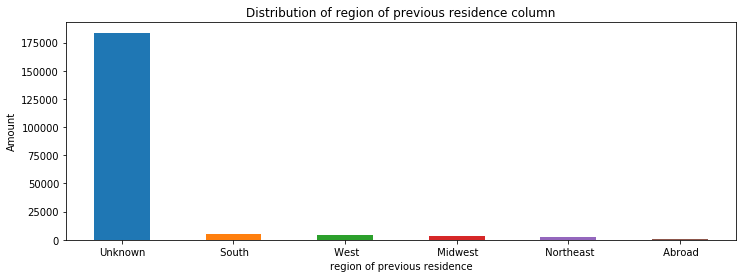

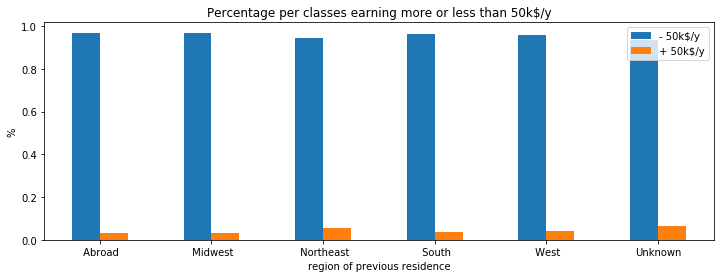

In [30]:
display_missing_values('region of previous residence')

df['region of previous residence'] = df['region of previous residence'].fillna('Unknown')
test['region of previous residence'] = test['region of previous residence'].fillna('Unknown')

plot_categorical_col('region of previous residence')

### 21 - state of previous residence

Missing values on train set :  183750  /  199523
Missing values on test set :  92068  /  99762


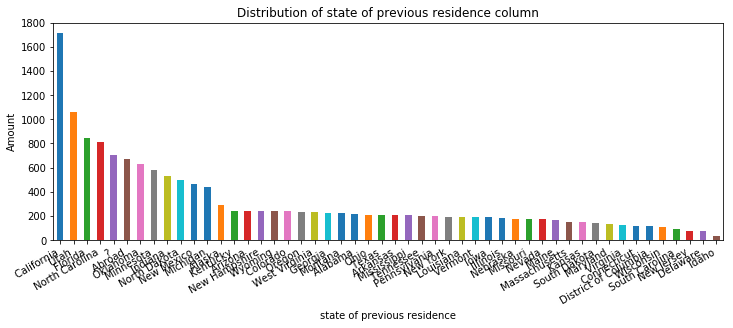

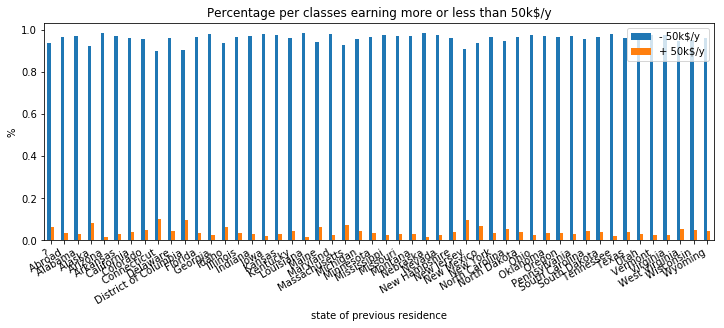

In [31]:
display_missing_values('state of previous residence')

plot_categorical_col('state of previous residence', rotation=30, alignment='right')

df['state of previous residence'] = df['state of previous residence'].fillna('Unknown')
test['state of previous residence'] = test['state of previous residence'].fillna('Unknown')

### 22 - detailed household and family stat

Missing values on train set :  0  /  199523
Missing values on test set :  0  /  99762


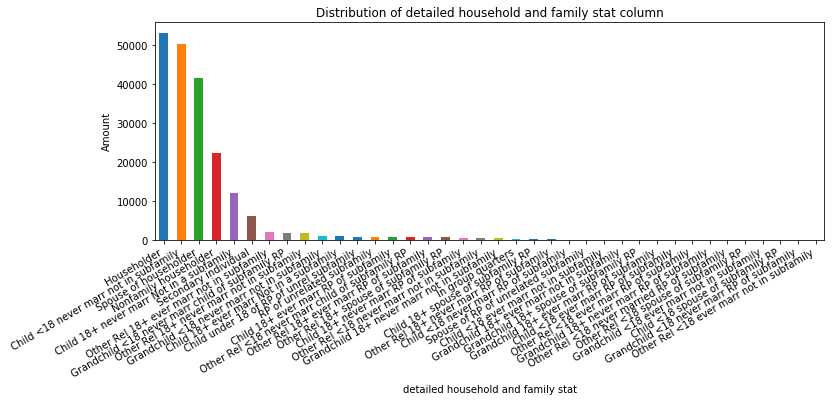

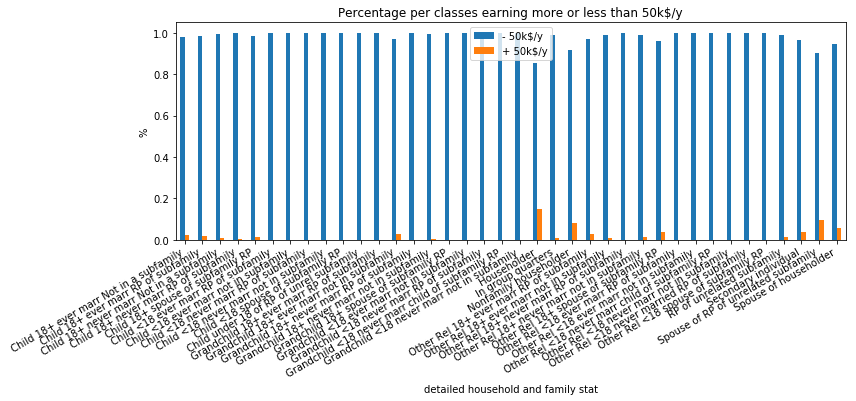

In [32]:
display_missing_values('detailed household and family stat')

plot_categorical_col('detailed household and family stat', rotation=30, alignment='right')

### 23 - detailed household summary in household

Missing values on train set :  0  /  199523
Missing values on test set :  0  /  99762


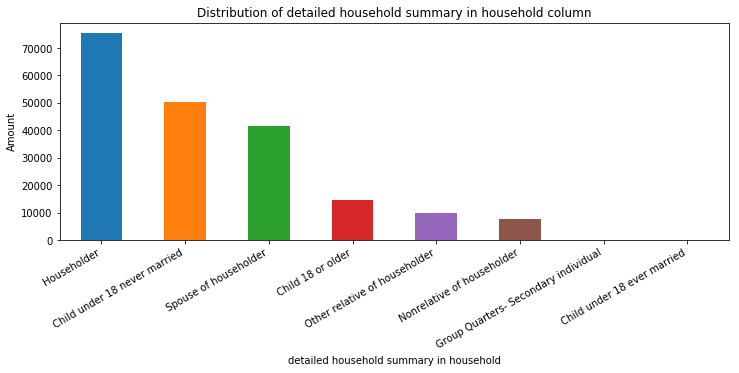

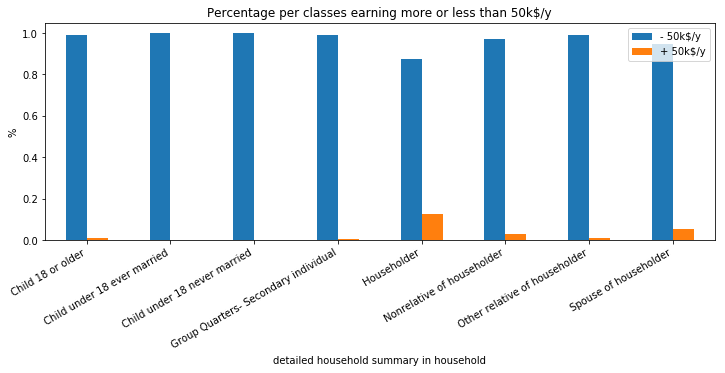

In [33]:
display_missing_values('detailed household summary in household')

plot_categorical_col('detailed household summary in household', rotation=30, alignment='right')

### 24 - 

Missing values on train set :  0  /  199523
Missing values on test set :  0  /  99762


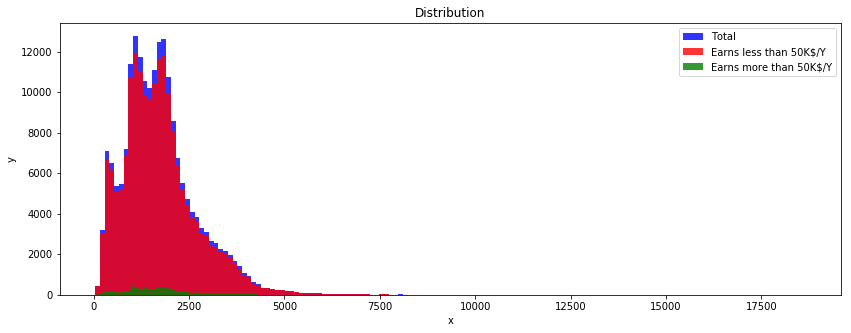

,col_to_determine,50k
col_to_determine,1.000000,0.014463
50k,0.014463,1.000000


In [34]:
display_missing_values('col_to_determine')

plt.figure(figsize=(14,5))
df['col_to_determine'].hist(bins=150, grid=False, alpha=0.8, color='b', label='Total')
df.loc[df['50k']==0, 'col_to_determine'].hist(bins=150, grid=False, alpha=0.8, color='r', label='Earns less than 50K$/Y')
df.loc[df['50k']==1, 'col_to_determine'].hist(bins=150, grid=False, alpha=0.8, color='g', label='Earns more than 50K$/Y')
plt.title('Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()

df[['col_to_determine','50k']].corr()

### 25 - migration code-change in msa

Missing values on train set :  1516  /  199523
Missing values on test set :  723  /  99762


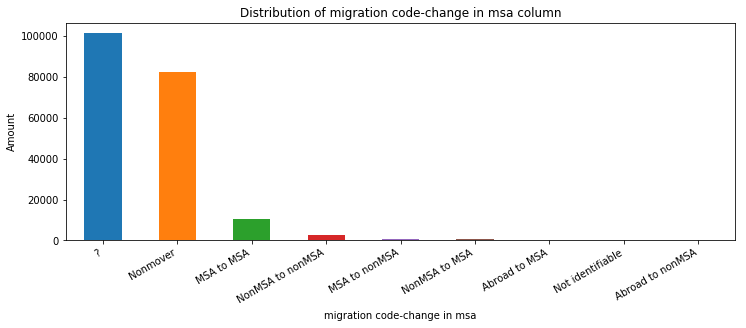

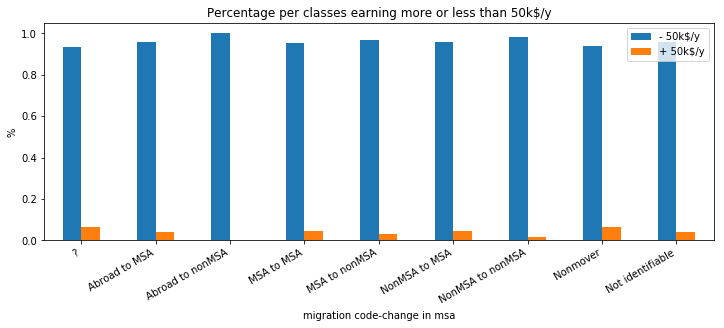

In [35]:
display_missing_values('migration code-change in msa')

df['migration code-change in msa'] = df['migration code-change in msa'].fillna(' ?')
test['migration code-change in msa'] = test['migration code-change in msa'].fillna(' ?')

plot_categorical_col('migration code-change in msa', rotation=30, alignment='right')

### 26 - migration code-change in reg

Missing values on train set :  1516  /  199523
Missing values on test set :  723  /  99762


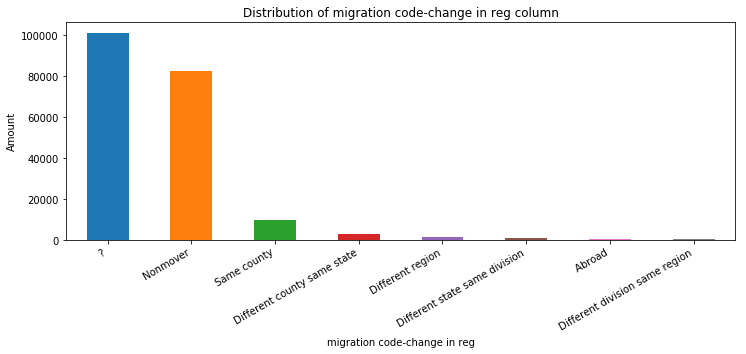

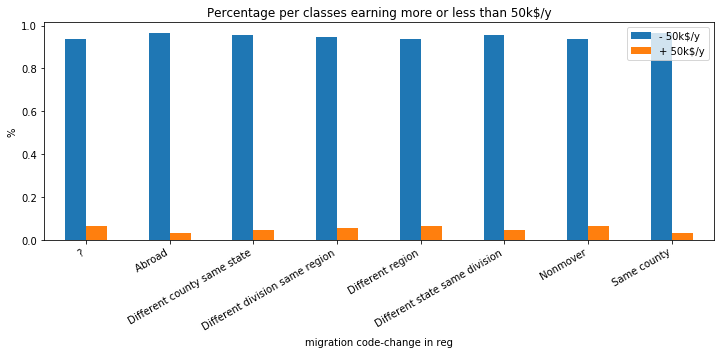

In [36]:
display_missing_values('migration code-change in reg')

df['migration code-change in reg'] = df['migration code-change in reg'].fillna(' ?')
test['migration code-change in reg'] = test['migration code-change in reg'].fillna(' ?')

plot_categorical_col('migration code-change in reg', rotation=30, alignment='right')

### 27 - migration code-move within reg

Missing values on train set :  1516  /  199523
Missing values on test set :  723  /  99762


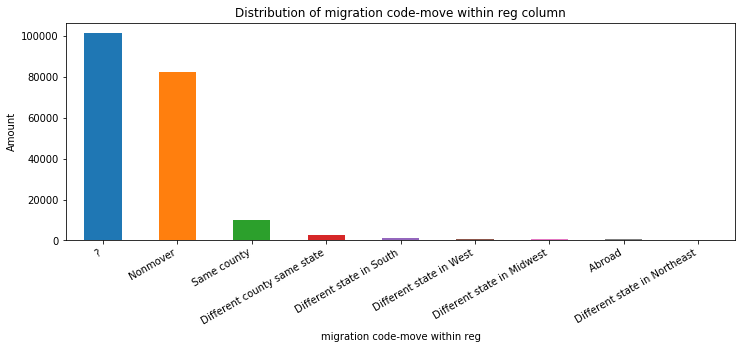

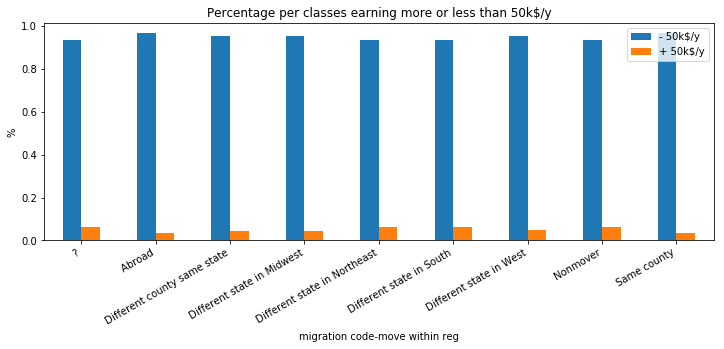

In [37]:
display_missing_values('migration code-move within reg')

df['migration code-move within reg'] = df['migration code-move within reg'].fillna(' ?')
test['migration code-move within reg'] = test['migration code-move within reg'].fillna(' ?')

plot_categorical_col('migration code-move within reg', rotation=30, alignment='right')

### 28 - live in this house 1 year ago

Missing values on train set :  0  /  199523
Missing values on test set :  0  /  99762


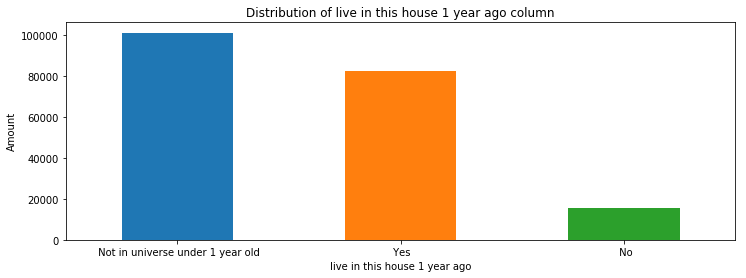

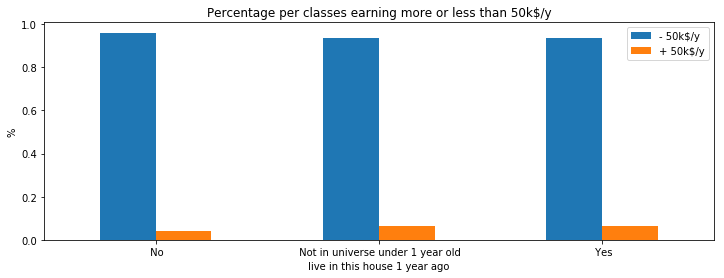

In [38]:
display_missing_values('live in this house 1 year ago')

plot_categorical_col('live in this house 1 year ago')

### 29 - migration prev res in sunbelt

Missing values on train set :  84054  /  199523
Missing values on test set :  42122  /  99762


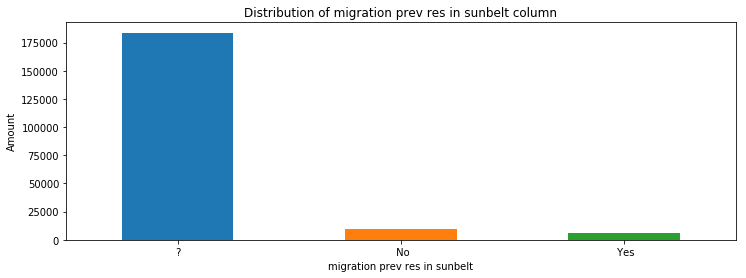

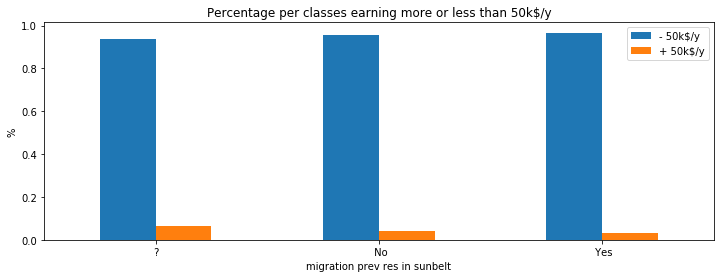

In [39]:
display_missing_values('migration prev res in sunbelt')

df['migration prev res in sunbelt'] = df['migration prev res in sunbelt'].fillna(' ?')
test['migration prev res in sunbelt'] = test['migration prev res in sunbelt'].fillna(' ?')

plot_categorical_col('migration prev res in sunbelt')

### 30 - num persons worked for employer

Missing values on train set :  0  /  199523
Missing values on test set :  0  /  99762


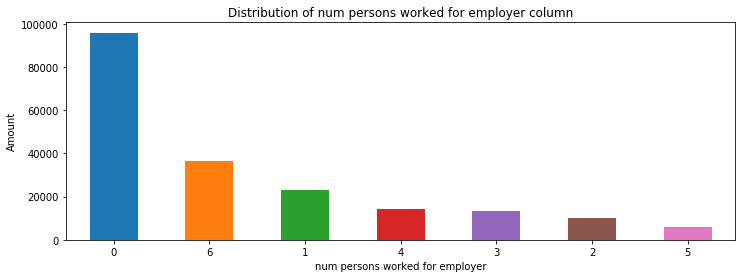

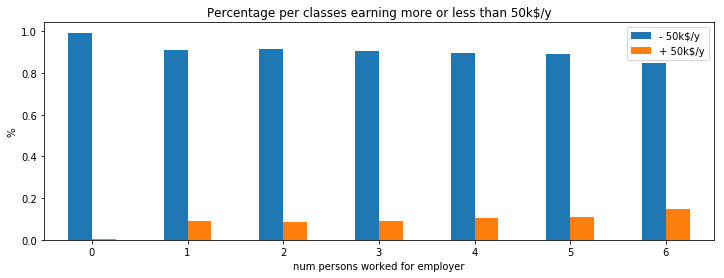

,num persons worked for employer,50k
num persons worked for employer,1.000000,0.222684
50k,0.222684,1.000000


In [40]:
display_missing_values('num persons worked for employer')

plot_categorical_col('num persons worked for employer')

df[['num persons worked for employer', '50k']].corr()

### 31 - family members under 18

Missing values on train set :  144232  /  199523
Missing values on test set :  72394  /  99762


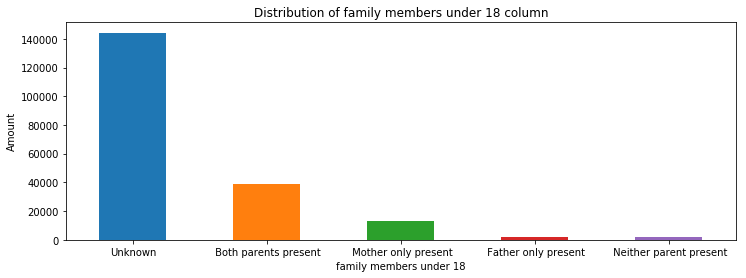

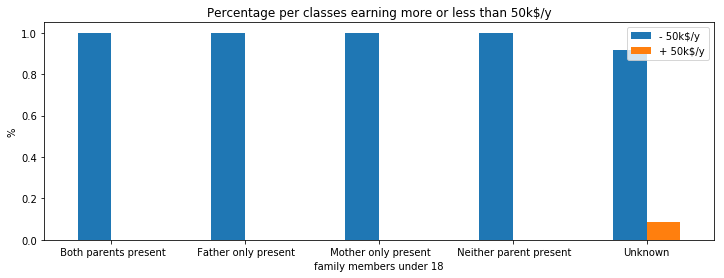

In [41]:
display_missing_values('family members under 18')

df['family members under 18'] = df['family members under 18'].fillna('Unknown')
test['family members under 18'] = test['family members under 18'].fillna('Unknown')

plot_categorical_col('family members under 18')

### 32 - country of birth father

Missing values on train set :  0  /  199523
Missing values on test set :  0  /  99762


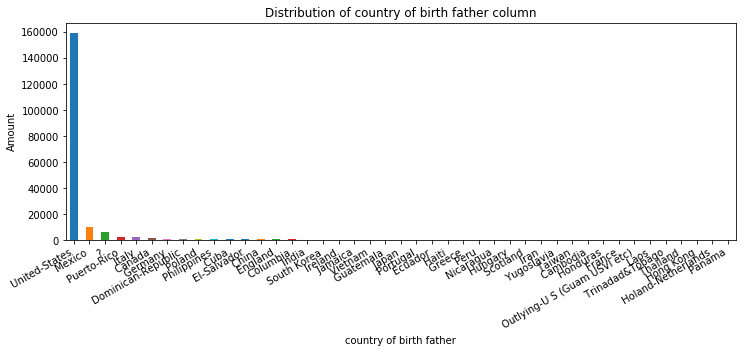

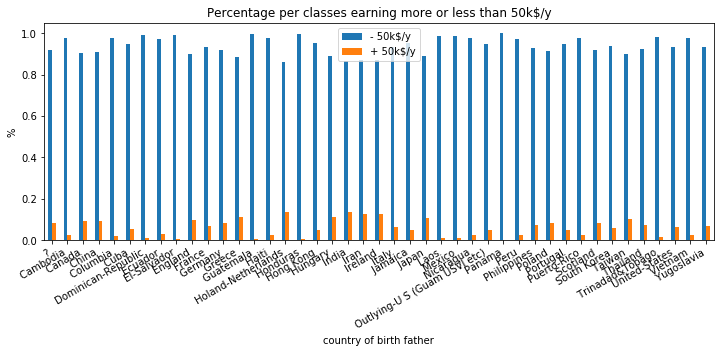

In [42]:
display_missing_values('country of birth father')

plot_categorical_col('country of birth father', rotation=30, alignment='right')

### 33 - country of birth mother

Missing values on train set :  0  /  199523
Missing values on test set :  0  /  99762


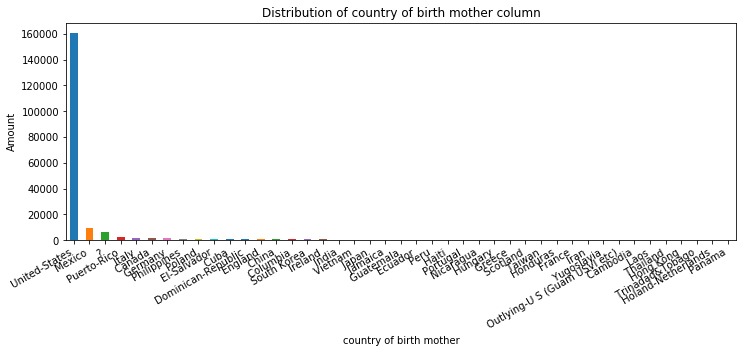

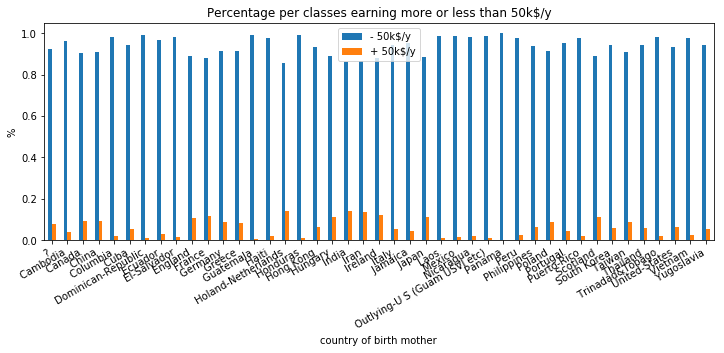

In [43]:
display_missing_values('country of birth mother')

plot_categorical_col('country of birth mother', alignment='right', rotation=30)

### 34 - country of birth self

Missing values on train set :  0  /  199523
Missing values on test set :  0  /  99762


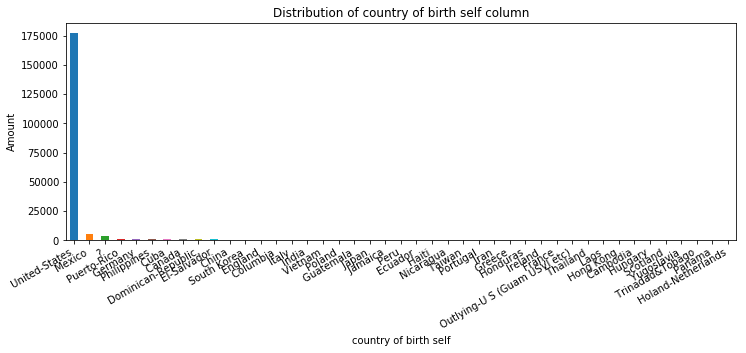

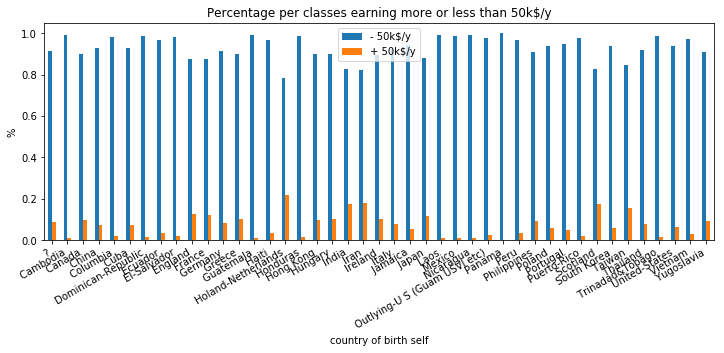

In [44]:
display_missing_values('country of birth self')

plot_categorical_col('country of birth self', rotation=30, alignment='right')

### 35 - citizenship

Missing values on train set :  0  /  199523
Missing values on test set :  0  /  99762


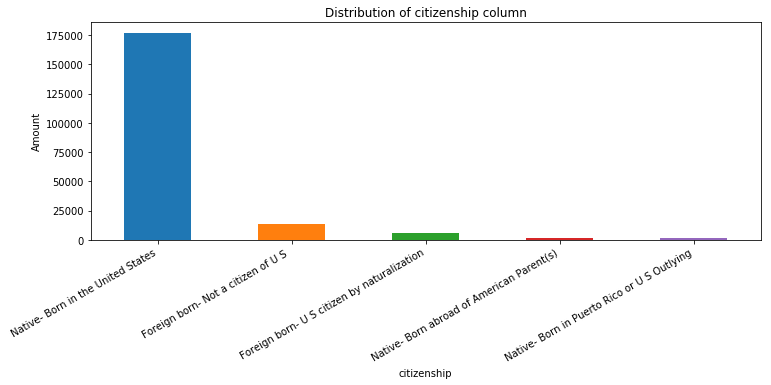

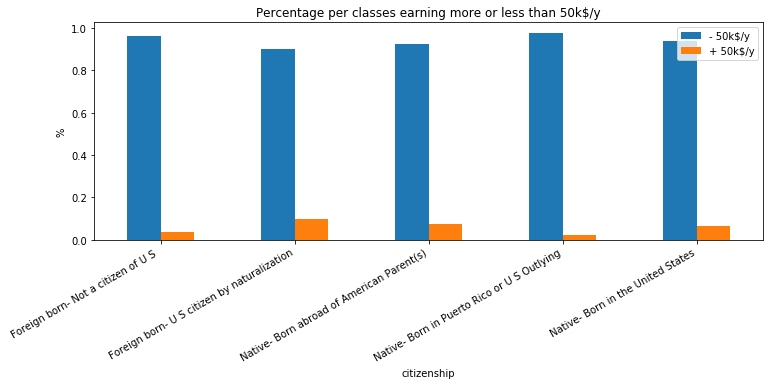

In [45]:
display_missing_values('citizenship')

plot_categorical_col('citizenship', rotation=30, alignment='right')

### 36 - own business or self employed

Missing values on train set :  0  /  199523
Missing values on test set :  0  /  99762


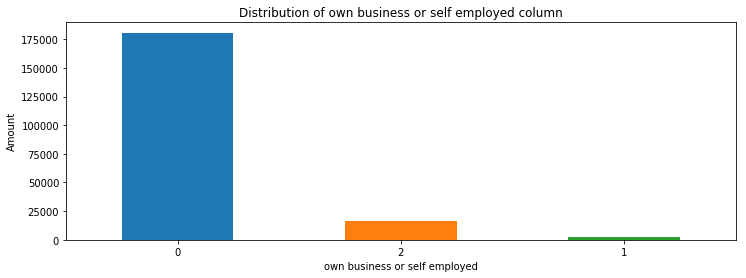

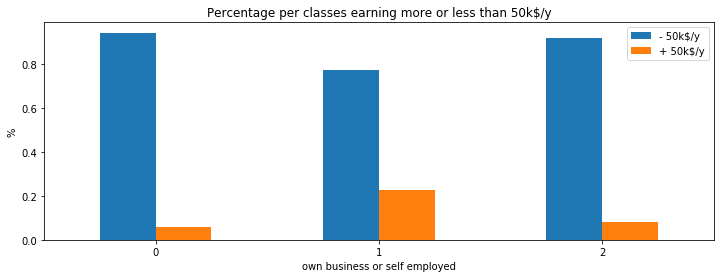

In [46]:
display_missing_values('own business or self employed')

plot_categorical_col('own business or self employed')

### 37 - fill inc questionnaire for veteran's admin

In [47]:
display_missing_values("fill inc questionnaire for veteran's admin")

Missing values on train set :  197539  /  199523
Missing values on test set :  98735  /  99762


### 38 - veterans benefits

Missing values on train set :  0  /  199523
Missing values on test set :  0  /  99762


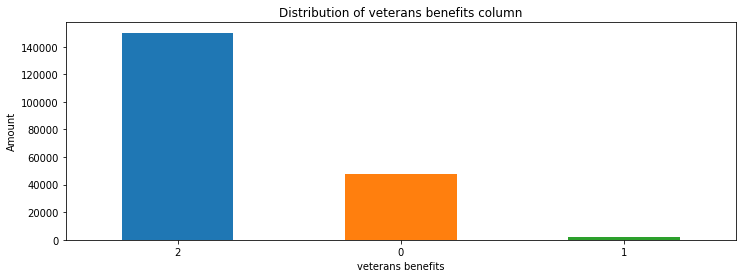

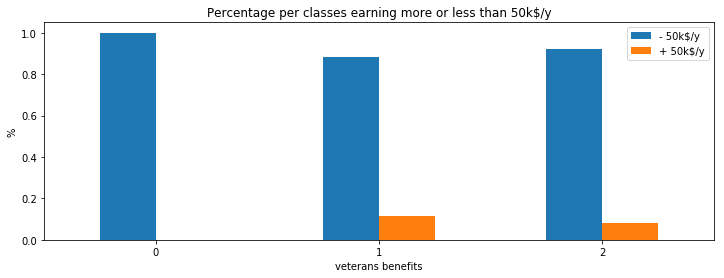

In [48]:
display_missing_values('veterans benefits')

plot_categorical_col('veterans benefits')

### 39 - weeks worked in year

Missing values on train set :  0  /  199523
Missing values on test set :  0  /  99762


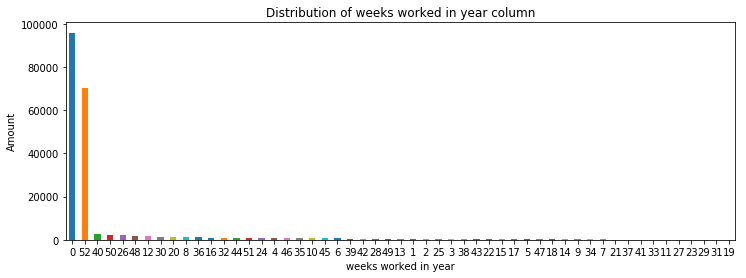

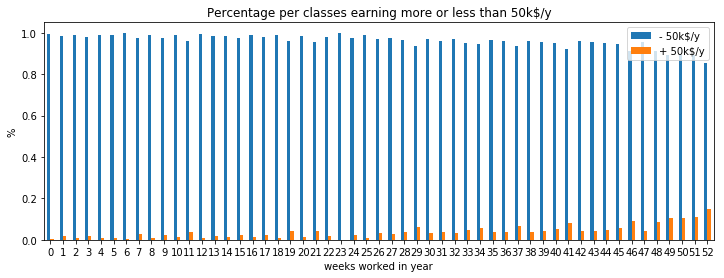

,weeks worked in year,50k
weeks worked in year,1.000000,0.262316
50k,0.262316,1.000000


In [49]:
display_missing_values('weeks worked in year')

plot_categorical_col('weeks worked in year')

df[['weeks worked in year','50k']].corr()

### 40 - year

Missing values on train set :  0  /  199523
Missing values on test set :  0  /  99762


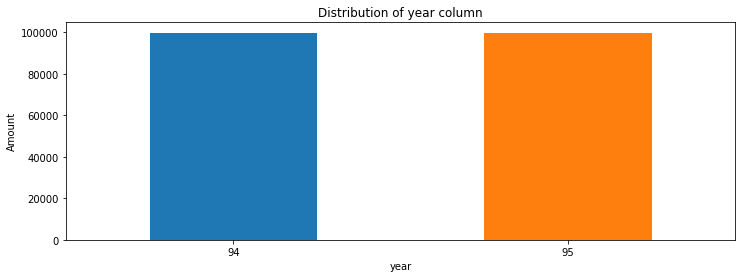

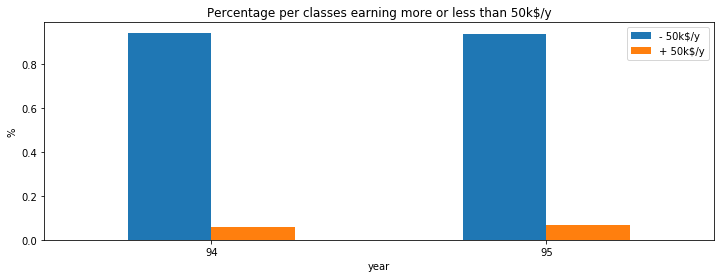

In [50]:
display_missing_values('year')

plot_categorical_col('year')

## II - Export DataSets

In [51]:
df.to_csv(PATH+'train.csv')
test.to_csv(PATH+'test.csv')